# SI 608 

### Build graph

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from fuzzywuzzy import process

/opt/miniconda3/envs/si608/lib/python3.12/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
df = pd.read_csv("dblp_graph_conference_v12_new_author.csv")

In [3]:

# exploded_author_ids = df['author_id'].str.split(';').explode()


# unique_author_ids = exploded_author_ids.unique()

# print("Unique Author IDs:", len(unique_author_ids))


In [4]:
# from itertools import combinations
# unique_pairs = set()

# for _, group in df.groupby('id'):
#     all_authors = set(';'.join(group['author_id']).split(';'))
    
#     if len(all_authors) < 2:
#         continue

#     unique_pairs.update(combinations(sorted(all_authors), 2))
# print("Number of unique collaboration pairs:", len(unique_pairs))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097006 entries, 0 to 1097005
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   index            1097006 non-null  int64  
 1   author_id        1097006 non-null  int64  
 2   author_name      1097006 non-null  object 
 3   author_org       1008180 non-null  object 
 4   id               1097006 non-null  int64  
 5   title            1097006 non-null  object 
 6   year             1097006 non-null  int64  
 7   n_citation       1097006 non-null  int64  
 8   doc_type         1097006 non-null  object 
 9   reference_count  1097006 non-null  float64
 10  references       991470 non-null   object 
 11  venue_id         1097006 non-null  int64  
 12  venue_name       1097006 non-null  object 
 13  venue_type       1097006 non-null  object 
 14  doi              939216 non-null   object 
 15  keyword          1097006 non-null  object 
 16  volume           1

In [6]:
df.isnull().sum()

index                    0
author_id                0
author_name              0
author_org           88826
id                       0
title                    0
year                     0
n_citation               0
doc_type                 0
reference_count          0
references          105536
venue_id                 0
venue_name               0
venue_type               0
doi                 157790
keyword                  0
volume              947805
issue              1037011
publisher                0
dtype: int64

In [7]:
df["author_org"] = df["author_org"].fillna("unknown")


# df["reference_count"] = df["reference_count"].fillna(0)

# df["keyword"] = df["keyword"].fillna("unknown")

# df["publisher"] = df["publisher"].fillna("unknown")


Missing doi's do not affect the data and are not filled

Volume and issue are also not filled since there are too many vacancies

#### Title df to Author df

In [8]:
journal_cols = df.columns.to_list()[:3] + df.columns.to_list()[6:]
print(journal_cols)

['index', 'author_id', 'author_name', 'year', 'n_citation', 'doc_type', 'reference_count', 'references', 'venue_id', 'venue_name', 'venue_type', 'doi', 'keyword', 'volume', 'issue', 'publisher']


In [9]:
# rows = []


# for i in range(len(df)):
#     author_names = df["author_name"][i].split(";")
#     author_ids = df["author_id"][i].split(";")
#     author_orgs = str(df["author_org"][i]).split(";")
#     journal_values = {col: df[col][i] for col in journal_cols}

#     for j, author_id in enumerate(author_ids):
#         row = {
#             "index": i,
#             "author_id": author_id,
#             "author_name": author_names[j] if j < len(author_names) else np.nan,
#             "author_org": author_orgs[j] if j < len(author_orgs) else np.nan,
#         }
#         row.update(journal_values)
#         rows.append(row)


# author_df = pd.DataFrame(rows)


In [10]:
author_df=df

In [11]:
# author_df["index"] = author_df["index"] + 1
# author_df["author_id"] = author_df["author_id"].astype(int)
# author_df['reference_count'] = author_df['reference_count'].astype(int)

#### Clean org

In [12]:
author_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097006 entries, 0 to 1097005
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   index            1097006 non-null  int64  
 1   author_id        1097006 non-null  int64  
 2   author_name      1097006 non-null  object 
 3   author_org       1097006 non-null  object 
 4   id               1097006 non-null  int64  
 5   title            1097006 non-null  object 
 6   year             1097006 non-null  int64  
 7   n_citation       1097006 non-null  int64  
 8   doc_type         1097006 non-null  object 
 9   reference_count  1097006 non-null  float64
 10  references       991470 non-null   object 
 11  venue_id         1097006 non-null  int64  
 12  venue_name       1097006 non-null  object 
 13  venue_type       1097006 non-null  object 
 14  doi              939216 non-null   object 
 15  keyword          1097006 non-null  object 
 16  volume           1

In [13]:
author_df.isnull().sum()

index                    0
author_id                0
author_name              0
author_org               0
id                       0
title                    0
year                     0
n_citation               0
doc_type                 0
reference_count          0
references          105536
venue_id                 0
venue_name               0
venue_type               0
doi                 157790
keyword                  0
volume              947805
issue              1037011
publisher                0
dtype: int64

In [14]:
def clean_org(org):
    if "email" in org:
        org = org.rsplit(",", 1)[0]
    return org


author_df.loc[author_df["author_org"] == "nan", "author_org"] = "unknown"
author_df["author_org"] = author_df["author_org"].apply(
    lambda x: x.strip('"').replace("#TAB#", "").strip()
)

author_df["author_org"] = author_df["author_org"].apply(clean_org)

In [15]:
print(author_df["author_org"].value_counts())

author_org
unknown                                                                   153105
Carnegie - Mellon University                                                3996
Stanford, University                                                        2273
Carnegie-Mellon Univ., Pittsburgh, PA, USA                                  1954
Carnegie Mellon University, Pittsburgh Pa                                   1756
                                                                           ...  
IRIT-UPS, Toulouse Cedex, France                                               1
THALES Communications France, Colombes, France                                 1
LIRIS, Lyon 1 Univ., Lyon, France                                              1
INRP, ENS Cachan, Cachan, France                                               1
Archaeological Computing Research Group, University of Southampton, UK         1
Name: count, Length: 243247, dtype: int64


In [16]:
author_df["author_org"].isnull().sum()

0

In [17]:
# organization_names = author_df["author_org"].unique()

# standardized_dict = {}
# threshold = 85

# for org_name in organization_names:
#     if org_name in standardized_dict:
#         continue
#     if org_name == "unknown":
#         standardized_dict[org_name] = org_name
#         continue
#     if not org_name.strip():
#         continue

#     matched_name = None
#     for std_name in standardized_dict.keys():
#         if process.extractOne(org_name, [std_name])[1] >= threshold:
#             matched_name = std_name
#             break

#     if matched_name:
#         standardized_dict[org_name] = matched_name
#     else:
#         standardized_dict[org_name] = org_name

# author_df["standard_org"] = author_df["author_org"].map(standardized_dict)

In [18]:
# author_df["standard_org"].isnull().sum()

In [19]:
# print(author_df.loc[author_df["standard_org"].isna(), "author_org"])

In [20]:
# author_df["standard_org"].value_counts()

In [21]:
# author=author_df.drop(columns=["author_org"])
# author["standard_org"].fillna("unknown", inplace=True)

#### Other paper related attributes

In [22]:
author=author_df
author.rename(columns={"author_org":"standard_org"}, inplace=True)

In [23]:
author["publisher"].value_counts()

publisher
IEEE                                                                                               376014
ACM                                                                                                164336
Springer, Berlin, Heidelberg                                                                       157110
unknown                                                                                            108753
Springer, Cham                                                                                      63753
                                                                                                    ...  
IEEE EMBS Int Conf Biomed Health Inform                                                                 1
The 26th International Conference on Software Engineering and Knowledge Engineering (SEKE 2014)         1
The 29th Pacific Asia Conference on Language, Information and Computation                               1
ACADEMIC PRESS LTD- ELSEVIER SCIENCE

In [24]:
author.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097006 entries, 0 to 1097005
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   index            1097006 non-null  int64  
 1   author_id        1097006 non-null  int64  
 2   author_name      1097006 non-null  object 
 3   standard_org     1097006 non-null  object 
 4   id               1097006 non-null  int64  
 5   title            1097006 non-null  object 
 6   year             1097006 non-null  int64  
 7   n_citation       1097006 non-null  int64  
 8   doc_type         1097006 non-null  object 
 9   reference_count  1097006 non-null  float64
 10  references       991470 non-null   object 
 11  venue_id         1097006 non-null  int64  
 12  venue_name       1097006 non-null  object 
 13  venue_type       1097006 non-null  object 
 14  doi              939216 non-null   object 
 15  keyword          1097006 non-null  object 
 16  volume           1

In [25]:
author['venue_name'].value_counts()

venue_name
National Conference on Artificial Intelligence                                     15827
Computer Vision and Pattern Recognition                                            15516
International Conference on Acoustics, Speech, and Signal Processing               13433
International Conference on Robotics and Automation                                12741
International Conference on Image Processing                                       11525
                                                                                   ...  
International Symposium on Power Electronics for Distributed Generation Systems        1
IEEE International Conference on Circuits and Systems for Communications               1
European Conference on Radiation and Its Effects on Components and Systems             1
Self-Sustaining Systems                                                                1
International Conference on Software Technology and Engineering                        1
Name: coun

### Split train and validation

In [26]:
most_recent_indices = author.groupby("author_id")["year"].idxmax()

valid = author.loc[most_recent_indices]

train = author.drop(most_recent_indices)

In [27]:
valid.shape

(29694, 19)

In [28]:
train.shape

(1067312, 19)

#### Build the graph

In [29]:
train.columns

Index(['index', 'author_id', 'author_name', 'standard_org', 'id', 'title',
       'year', 'n_citation', 'doc_type', 'reference_count', 'references',
       'venue_id', 'venue_name', 'venue_type', 'doi', 'keyword', 'volume',
       'issue', 'publisher'],
      dtype='object')

In [30]:
train['author_id'].value_counts()   

author_id
2125104194    796
2121069363    701
296576950     694
2168417342    661
2121939561    630
             ... 
2689927708      4
2665205769      4
2294120791      4
2590407387      4
2937986853      4
Name: count, Length: 29694, dtype: int64

In [31]:
citation_grouped= train.groupby("author_id")['n_citation'].sum().reset_index(name="total_citation")
train=train.merge(citation_grouped, on="author_id", how="left")

paper_grouped= train.groupby("author_id")['index'].count().reset_index(name="total_paper")
train=train.merge(paper_grouped, on="author_id", how="left")

reference_grouped= train.groupby("author_id")['reference_count'].mean().reset_index(name="avg_reference")
train=train.merge(reference_grouped, on="author_id", how="left")

In [32]:
def merge_keywords(keywords):
    all_keywords = set()
    for kw in keywords:
        all_keywords.update(kw.split(';'))
    return all_keywords


author_keywords = train.groupby("author_id")["keyword"].apply(merge_keywords).reset_index(name='total_keyword')
train=train.merge(author_keywords, on="author_id", how="left")

In [33]:
# calculate the proportion of first author papers -- for the same paper, if the author is the first author, then the value is 1, otherwise 0
train["author_pos"] = train.groupby("index").cumcount() + 1

In [34]:
train["first_author"] = train["author_pos"].apply(lambda x: 1 if x == 1 else 0)
first_author_grouped = train.groupby("author_id")["first_author"].mean().reset_index(name="prop_first_author")
train = train.merge(first_author_grouped, on="author_id", how="left")

In [35]:
train.sample(5)

,index,author_id,author_name,standard_org,id,title,year,n_citation,doc_type,reference_count,...,volume,issue,publisher,total_citation,total_paper,avg_reference,total_keyword,author_pos,first_author,prop_first_author
747812,511272,2131355417,Chenxi Qiu,"Dept. of Electr. & Comput. Eng, Clemson Univ.,...",2249810539,Link Scheduling in Wireless Cooperative Commun...,2015,0,Conference,11.0,...,NaN,NaN,IEEE,131,25,15.840000,"{Telecommunications network, Energy resources,...",1,1,0.920000
610713,418462,2158158407,T.H. Cao,"Dept. of Eng. Math., Bristol Univ., , UK",2138067424,User recognition in uncertain object oriented ...,2001,4,Conference,0.0,...,2.0,NaN,IEEE,299,34,10.088235,"{Knowledge base, Information retrieval, Full t...",1,1,0.941176
855695,581834,2631680729,Yang Yang,National Key Laboratory for Novel Software Tec...,2575999630,Learning by actively querying strong modal fea...,2016,1,Conference,19.0,...,NaN,NaN,AAAI Press,30,13,18.153846,"{Modal, Discriminative model, Computer science...",1,1,1.000000
40889,28552,2144577230,Soner Önder,Michigan Technological University,146413762,Instruction Wake-Up in Wide Issue Superscalars,2001,8,Conference,18.0,...,NaN,NaN,"Springer, Berlin, Heidelberg",336,23,17.173913,"{Fuse (electrical), Memory architecture, Congr...",1,1,0.826087
549195,376452,340253981,Tommi S. Jaakkola,unknown,2119771368,On the Partition Function and Random Maximum A...,2012,25,Conference,17.0,...,NaN,NaN,ArXiv,8935,103,10.291262,"{Discriminative model, Minimax, A priori and a...",2,0,0.349515


<Axes: >

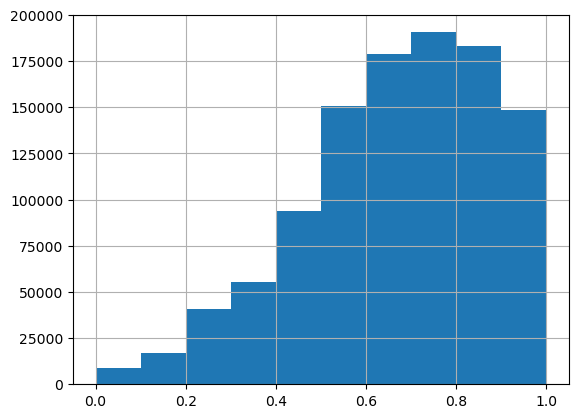

In [36]:
train['prop_first_author'].hist()

In [37]:
G_train = nx.Graph()

In [38]:
for index, row in train.iterrows():
    author_id = row['author_id']
    if not G_train.has_node(author_id):
        G_train.add_node(
            author_id,
            name=row['author_name'],
            org=row['standard_org'],
            total_citation=row["total_citation"], 
            total_paper=row["total_paper"],
            avg_reference=row["avg_reference"],     
            keywords=row["total_keyword"],
            prop_first_author=row["prop_first_author"]   
        )

In [39]:
for paper_id, group in train.groupby('id'):

    authors = group['author_id'].tolist()
    id = group['id'].iloc[0]
    title = group['title'].iloc[0]
    year = group['year'].iloc[0]
    venue_id = group['venue_id'].iloc[0]
    venue_name = group['venue_name'].iloc[0]
    publisher = group['publisher'].iloc[0]
    citations = group['n_citation'].iloc[0]
    

    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            author1 = authors[i]
            author2 = authors[j]
            
            if G_train.has_edge(author1, author2):
                G_train[author1][author2]['weight'] += 1
                G_train[author1][author2]['papers'].append({'id': id, 'title': title, 'year': year,'venue_id':venue_id,'venue_name':venue_name,'publisher':publisher,'citations_for_this_paper':citations})
            else:
                G_train.add_edge(
                    author1,
                    author2,
                    weight=1,
                    papers=[{'id': id, 'title': title, 'year': year,'venue_id':venue_id,'venue_name':venue_name,'publisher':publisher,'citations_for_this_paper':citations}],
                )


### Network Analysis

In [40]:
print("# components: ",nx.number_connected_components(G_train))

nodes_num=len(G_train.nodes())
print('# nodes: ',nodes_num)

edges_num=len(G_train.edges())
print('# edge: ',edges_num)

largest_component = max(nx.connected_components(G_train), key=len)
percent_lc=round(len(largest_component)/nodes_num*100,2)
print("%_largest component: ",percent_lc)

# average degree
degree_dict=dict(nx.degree(G_train))
avg_d=sum(degree_dict.values())/len(G_train.nodes())
print("average degree: ",avg_d)

# average clustering coefficient
avg_cc=nx.average_clustering(G_train)
print("average clustering coefficient: ",avg_cc)

# average degree centrality
degree_centrality_dict = nx.degree_centrality(G_train)
avg_dc=sum(degree_centrality_dict.values())/len(G_train.nodes())
print("average degree centrality: ",avg_dc)

# components:  1095
# nodes:  29694
# edge:  153857
%_largest component:  94.4
average degree:  10.362834242607935
average clustering coefficient:  0.37782319359036604
average degree centrality:  0.0003489992335772045


In [41]:
# store in nodes attributes: degree, degree centrality, and PageRank
nx.set_node_attributes(G_train, degree_dict, 'degree')
nx.set_node_attributes(G_train, degree_centrality_dict, 'degree_centrality')
nx.set_node_attributes(G_train, nx.pagerank(G_train), 'pagerank')

In [47]:
# Community detection
communities = nx.algorithms.community.greedy_modularity_communities(G_train)
communities = [list(c) for c in communities]
print("Number of communities:", len(communities))

Number of communities: 1389


In [48]:
# Assign community id to each author
community_dict = {node: cid for cid, nodes in enumerate(communities) for node in nodes}
nx.set_node_attributes(G_train, community_dict, 'community')

In [52]:
nodes_df = pd.DataFrame({
    'author_id': list(G_train.nodes()),
    'name': [G_train.nodes[node]['name'] for node in G_train.nodes()],
    'org': [G_train.nodes[node]['org'] for node in G_train.nodes()],
    'degree': [G_train.nodes[node]['degree'] for node in G_train.nodes()],
    'degree_centrality': [G_train.nodes[node]['degree_centrality'] for node in G_train.nodes()],
    'total_citation': [G_train.nodes[node]['total_citation'] for node in G_train.nodes()],
    'total_paper': [G_train.nodes[node]['total_paper'] for node in G_train.nodes()],
    'prop_first_author': [G_train.nodes[node]['prop_first_author'] for node in G_train.nodes()],
    'pagerank': [G_train.nodes[node]['pagerank'] for node in G_train.nodes()],
    'community': [G_train.nodes[node]['community'] for node in G_train.nodes()],
    'avg_reference': [G_train.nodes[node]['avg_reference'] for node in G_train.nodes()]
})

In [53]:
nodes_df.sample(5)

,author_id,name,org,degree,degree_centrality,total_citation,total_paper,prop_first_author,pagerank,community,avg_reference
7103,693769535,Steven P. Reiss,unknown,7,0.000236,2742,84,0.892857,0.000047,3,16.500000
25699,1912200641,Feng Duan,"Dept. of Precision Eng., Univ. of Tokyo, Tokyo",6,0.000202,200,36,0.555556,0.000035,4,6.388889
21792,2049801381,Daniela Oelke,"Chair of Data Analysis and Visualization, Univ...",4,0.000135,334,15,0.533333,0.000020,19,12.400000
5055,2147904611,Ingo Wald,Saarland University,16,0.000539,4228,58,0.758621,0.000049,0,14.000000
3136,13215008,Stefan Woltran,"Institut für Informationssysteme, Technische U...",35,0.001179,1720,133,0.270677,0.000123,2,16.368421


In [54]:
nodes_df.to_csv("author_graph.csv", index=False)

In [ ]:
# export nodes and edges in different csv files
nodes = pd.DataFrame(G_train.nodes(data=True))
nodes.index = nodes.index.astype(int)
nodes.to_csv('nodes.csv')

edges = pd.DataFrame(G_train.edges(data=True))
edges['author_1'] = edges[0]
edges['author_2'] = edges[1]
edges = edges.drop([0, 1], axis=1)
edges.to_csv('edges.csv')

In [42]:
import altair as alt
# visualize using altair

# Choose top 1000 nodes by degree and build subgraph
top_degree_nodes = sorted(G_train.nodes, key=lambda x: G_train.degree(x), reverse=True)[:1000]
G_top = G_train.subgraph(top_degree_nodes)
G_top.number_of_nodes(), G_top.number_of_edges()

(1000, 8929)

In [ ]:
node_sizes = [G_top.nodes[author]["total_citation"] for author in G_top.nodes]
pos = nx.spring_layout(G_top)
# node_sizes

[1820,
 5171,
 23902,
 8292,
 2614,
 1952,
 13302,
 1279,
 605,
 12647,
 9495,
 1630,
 2313,
 3775,
 11922,
 944,
 2248,
 1953,
 5889,
 7959,
 7324,
 2040,
 4730,
 5516,
 2005,
 2278,
 9001,
 3950,
 134,
 45780,
 4099,
 1779,
 1000,
 1588,
 12087,
 1682,
 1236,
 4765,
 3784,
 1253,
 7763,
 2467,
 2098,
 347,
 2391,
 30646,
 11198,
 3587,
 5208,
 5146,
 628,
 698,
 144,
 10518,
 9530,
 2063,
 1326,
 10594,
 271,
 6168,
 2608,
 8331,
 744,
 3055,
 2173,
 1340,
 17848,
 8924,
 6761,
 7670,
 6154,
 2070,
 20418,
 1286,
 3661,
 544,
 1810,
 5630,
 3723,
 6897,
 3302,
 21983,
 1502,
 4436,
 5482,
 16648,
 2506,
 2106,
 7623,
 11075,
 2486,
 1517,
 9447,
 515,
 4293,
 18422,
 2912,
 1753,
 1816,
 1261,
 1393,
 4313,
 12573,
 4280,
 7132,
 5101,
 2374,
 2815,
 1714,
 9448,
 2999,
 4932,
 748,
 547,
 10237,
 181,
 3980,
 11351,
 1262,
 994,
 5929,
 3209,
 9886,
 7133,
 1657,
 5668,
 4628,
 2830,
 902,
 843,
 463,
 8286,
 11387,
 2354,
 33641,
 6836,
 7834,
 7862,
 8901,
 6109,
 3140,
 14179,
 5

In [46]:
top_nodes_df = pd.DataFrame({
    'author_id': top_degree_nodes,
    'name': [G_train.nodes[author]["name"] for author in top_degree_nodes],
    'org' : [G_train.nodes[author]["org"] for author in top_degree_nodes],
    'degree': [G_train.degree(n) for n in top_degree_nodes],
    'x': [pos[n][0] for n in top_degree_nodes],
    'y': [pos[n][1] for n in top_degree_nodes],
    'total_citation':  [G_train.nodes[n]["total_citation"] for n in top_degree_nodes],
    'total_paper': [G_train.nodes[n]["total_paper"] for n in top_degree_nodes],
    'avg_reference': [G_train.nodes[n]["avg_reference"] for n in top_degree_nodes]
})

alt_chart = alt.Chart(top_nodes_df).mark_circle().encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None),
    size=alt.Size('total_citation:Q', legend=None),
    color=alt.Color('total_paper:Q', scale=alt.Scale(scheme='blueorange')),
    tooltip=['name:N', 'org:N', 'total_citation:Q', 'total_paper:Q']
).interactive()  # This makes the chart zoomable and pannable

# Display Altair chart
alt_chart

/opt/miniconda3/envs/si608/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/miniconda3/envs/si608/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

Text(0.5, 0, 'rank')

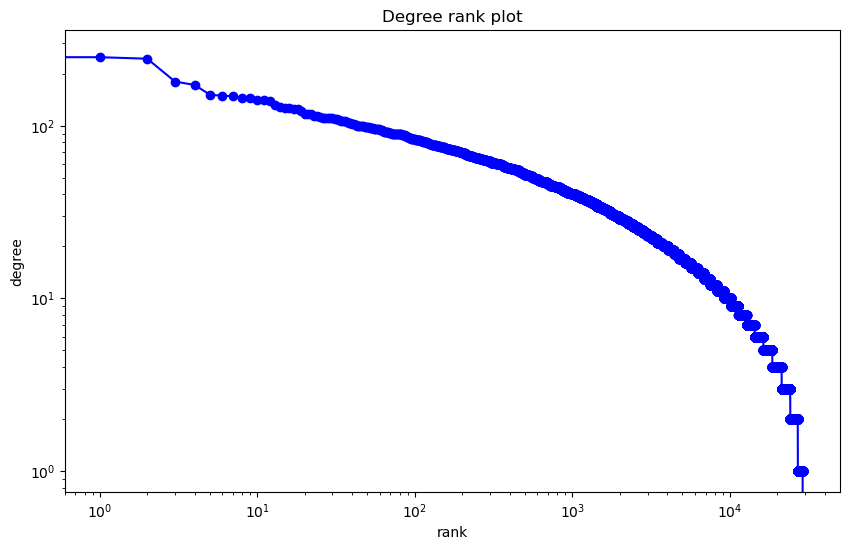

In [47]:
# Degree distribution of the graph
degree_sequence = sorted([d for n, d in G_train.degree()], reverse=True)

plt.figure(figsize=(10, 6))
plt.loglog(degree_sequence, "b-", marker="o")
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")